In [1]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import geopandas as gpd
import pandas as pd
import geodatasets as gds
import numpy as np
import folium
from matplotlib import pyplot as plt
import seaborn as sns
import pysal

C:\Users\valiz\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,
C:\Users\valiz\anaconda3\Lib\site-packages\pysal\lib\cg\alpha_shapes.py:33: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
C:\Users\valiz\anaconda3\Lib\site-packages\pysal\lib\cg\alpha_shapes.py:154: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-f

# DATOS MULTIVARIADOS

## REDUCCIÓN DE DATOS Y CLUSTERIZACIÓN

La típica representación de un conjunto de datos multivariados $A$ con $n$ observaciones y $p$ variables es a través de una matrix $n \times p$.

$
A = 
\begin{Vmatrix}
a_{1,1}& \cdots & a_{1,p}\\
\vdots & \ddots & \vdots \\
a_{n,1}& \cdots & a_{n,p}
\end{Vmatrix}
\tag{1}
$

Los datos multivariados existen en el espacio multidimensional, donde el número de dimensiones es igual al número de variables.

Los métodos de análisis estadístico multivariado emplean distancias métricas como: la distancia Euclidea o la distancia Minkowski para expresar disimilaridad (o similaridad) entre observaciones. En este caso las distancias próximas o cortas reflejan similaridad en contraste con las distancias lejanas.

### Miremos la distancia Euclidea con un ejemplo

$S = \sqrt{ \left(X_2 - X_1 \right)^{2} + \left(Y_2 - Y_1 \right)^{2} } \tag{1}$

In [2]:
gds.data

{'geoda': {'airbnb': {'url': 'https://geodacenter.github.io/data-and-lab//data/airbnb.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.airbnb',
   'description': 'Airbnb rentals, socioeconomics, and crime in Chicago',
   'geometry_type': 'Polygon',
   'nrows': 77,
   'ncols': 21,
   'details': 'https://geodacenter.github.io/data-and-lab//airbnb/',
   'hash': 'a2ab1e3f938226d287dd76cde18c00e2d3a260640dd826da7131827d9e76c824',
   'filename': 'airbnb.zip'},
  'atlanta': {'url': 'https://geodacenter.github.io/data-and-lab//data/atlanta_hom.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.atlanta',
   'description': 'Atlanta, GA region homicide counts and rates',
   'geometry_type': 'Polygon',
   'nrows': 90,
   'ncols': 24,
   'details': 'https://geodacenter.github.io/data-and-lab//atlanta_old/',
   'hash': 'a33a76e12168fe84361e60c88a9df4856730487305846c559715c89b1a2b5e09',
   'filename': 'atlanta_hom.zip',
   'members': ['atlanta_hom/atl_hom.geojson']},
  'cars': {'url': 'https://geodacenter.github.io/data-and-lab//data/Abandoned_Vehicles_Map.csv',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.cars',
   'description': '2011 abandoned vehicles in Chicago (311 complaints).',
   'geometry_type': 'Point',
   'nrows': 137867,
   'ncols': 21,
   'details': 'https://geodacenter.github.io/data-and-lab//1-source-and-description/',
   'hash': '6a0b23bc7eda2dcf1af02d43ccf506b24ca8d8c6dc2fe86a2a1cc051b03aae9e',
   'filename': 'Abandoned_Vehicles_Map.csv'},
  'charleston1': {'url': 'https://geodacenter.github.io/data-and-lab//data/CharlestonMSA.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.charleston1',
   'description': '2000 Census Tract Data for Charleston, SC MSA and counties',
   'geometry_type': 'Polygon',
   'nrows': 117,
   'ncols': 31,
   'details': 'https://geodacenter.github.io/data-and-lab//charleston-1_old/',
   'hash': '4a4fa9c8dd4231ae0b2f12f24895b8336bcab0c28c48653a967cffe011f63a7c',
   'filename': 'CharlestonMSA.zip',
   'members': ['CharlestonMSA/sc_final_census2.gpkg']},
  'charleston2': {'url': 'https://geodacenter.github.io/data-and-lab//data/CharlestonMSA2.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.charleston2',
   'description': '1998 and 2001 Zip Code Business Patterns (Census Bureau) for Charleston, SC MSA',
   'geometry_type': 'Polygon',
   'nrows': 42,
   'ncols': 60,
   'details': 'https://geodacenter.github.io/data-and-lab//charleston2/',
   'hash': '056d5d6e236b5bd95f5aee26c77bbe7d61bd07db5aaf72866c2f545205c1d8d7',
   'filename': 'CharlestonMSA2.zip',
   'members': ['CharlestonMSA2/CharlestonMSA2.gpkg']},
  'chicago_health': {'url': 'https://geodacenter.github.io/data-and-lab//data/comarea.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.chicago_health',
   'description': 'Chicago Health + Socio-Economics',
   'geometry_type': 'Polygon',
   'nrows': 77,
   'ncols': 87,
   'details': 'https://geodacenter.github.io/data-and-lab//comarea_vars/',
   'hash': '4e872adb552786eae2fcd745524696e5e4cd33cc9a6c032471c0e75328871401',
   'filename': 'comarea.zip'},
  'chicago_commpop': {'url': 'https://geodacenter.github.io/data-and-lab//data/chicago_commpop.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.chicago_commpop',
   'description': 'Chicago Community Area Population Percent Change for 2000 and 2010',
   'geometry_type': 'Polygon',
   'nrows': 77,
   'ncols': 9,
   'details': 'https://geodacenter.github.io/data-and-lab//commpop/',
   'hash': '1dbebb50c8ea47e2279ea819ef64ba793bdee2b88e4716bd6c6ec0e0d8e0e05b',
   'filename': 'c

In [3]:
#Datos de: Mortal statistics of France (Guerry, 1833)
Guerri = gpd.read_file(gds.get_path("geodaguerry"))
Guerri.head(5)

dept Region       Dprtmnt  Crm_prs  Crm_prp  Litercy  Donatns  Infants  \
0   1.0      E           Ain  28870.0  15890.0     37.0   5098.0  33120.0   
1   2.0      N         Aisne  26226.0   5521.0     51.0   8901.0  14572.0   
2   3.0      C        Allier  26747.0   7925.0     13.0  10973.0  17044.0   
3   4.0      E  Basses-Alpes  12935.0   7289.0     46.0   2733.0  23018.0   
4   5.0      E  Hautes-Alpes  17488.0   8174.0     69.0   6962.0  23076.0   

    Suicids  MainCty  ...  Infntcd  Dntn_cl  Lottery  Desertn  Instrct  \
0   35039.0      2.0  ...     60.0     69.0     41.0     55.0     46.0   
1   12831.0      2.0  ...     82.0     36.0     38.0     82.0     24.0   
2  114121.0      2.0  ...     42.0     76.0     66.0     16.0     85.0   
3   14238.0      1.0  ...     12.0     37.0     80.0     32.0     29.0   
4   16171.0      1.0  ...     23.0     64.0     79.0     35.0      7.0   

   Prsttts  Distanc    Area  Pop1831  \
0     13.0  218.372  5762.0   346.03   
1    327.0   65.945  7369.0   513.00   
2     34.0  161.927  7340.0   298.26   
3      2.0  351.399  6925.0   155.90   
4      1.0  320.280  5549.0   129.10   

                                            geometry  
0  POLYGON ((801150.000 2092615.000, 800669.000 2...  
1  POLYGON ((729326.000 2521619.000, 729320.000 2...  
2  POLYGON ((710830.000 2137350.000, 711746.000 2...  
3  POLYGON ((882701.000 1920024.000, 882408.000 1...  
4  POLYGON ((886504.000 1922890.000, 885733.000 1...  

[5 rows x 24 columns]

In [4]:
#Revisemos los datos de suicidio
np.unique(Guerri.Suicids)

array([  3460.,   3632.,   5994.,   7315.,   8107.,   8334.,   9523.,
        10989.,  11092.,  11813.,  12789.,  12831.,  12836.,  13380.,
        13463.,  13493.,  13851.,  14238.,  14417.,  15015.,  15272.,
        15400.,  15652.,  16128.,  16171.,  16798.,  17003.,  18292.,
        18623.,  19024.,  19220.,  19497.,  19586.,  21233.,  21851.,
        22184.,  23816.,  24533.,  25014.,  25143.,  25572.,  25720.,
        26198.,  27289.,  28331.,  29280.,  29381.,  30869.,  31807.,
        33029.,  33358.,  33497.,  34069.,  34196.,  34476.,  35039.,
        35375.,  36024.,  36275.,  37843.,  38501.,  39714.,  40690.,
        45180.,  47480.,  48317.,  48783.,  52547.,  55564.,  56140.,
        61510.,  65995.,  66498.,  67963.,  68980.,  71364.,  75056.,
        77823.,  78148.,  87338., 114121., 116671., 123625., 148039.,
       163241.])

In [5]:
#Revisemos las características generales del dataset
Guerri.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   dept      85 non-null     float64 
 1   Region    85 non-null     object  
 2   Dprtmnt   85 non-null     object  
 3   Crm_prs   85 non-null     float64 
 4   Crm_prp   85 non-null     float64 
 5   Litercy   85 non-null     float64 
 6   Donatns   85 non-null     float64 
 7   Infants   85 non-null     float64 
 8   Suicids   85 non-null     float64 
 9   MainCty   85 non-null     float64 
 10  Wealth    85 non-null     float64 
 11  Commerc   85 non-null     float64 
 12  Clergy    85 non-null     float64 
 13  Crm_prn   85 non-null     float64 
 14  Infntcd   85 non-null     float64 
 15  Dntn_cl   85 non-null     float64 
 16  Lottery   85 non-null     float64 
 17  Desertn   85 non-null     float64 
 18  Instrct   85 non-null     float64 
 19  Prsttts   85 non-null     float64 
 20  Dist

In [6]:
#Presencia de datos ausentes
Guerri[Guerri.isna()].count()

dept        0
Region      0
Dprtmnt     0
Crm_prs     0
Crm_prp     0
Litercy     0
Donatns     0
Infants     0
Suicids     0
MainCty     0
Wealth      0
Commerc     0
Clergy      0
Crm_prn     0
Infntcd     0
Dntn_cl     0
Lottery     0
Desertn     0
Instrct     0
Prsttts     0
Distanc     0
Area        0
Pop1831     0
geometry    0
dtype: int64

In [7]:
#Sistema de referencia de coordenadas
Guerri.crs

<Derived Projected CRS: EPSG:27572>
Name: NTF (Paris) / Lambert zone II
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: France mainland onshore between 50.5 grads and 53.5 grads North (45°27'N to 48°09'N). Also used over all onshore mainland France.
- bounds: (-4.87, 42.33, 8.23, 51.14)
Coordinate Operation:
- name: Lambert zone II
- method: Lambert Conic Conformal (1SP)
Datum: Nouvelle Triangulation Francaise (Paris)
- Ellipsoid: Clarke 1880 (IGN)
- Prime Meridian: Paris

In [8]:
#Cambiemos el sistema de coordenadas a metros
#Guerri=Sacramento.to_crs("3395")
#Guerri.crs

In [9]:
# Creemos las listas de longitudes y latitudes de los datos

longitud = Guerri.centroid.x
latitud  = Guerri.centroid.y

In [10]:
# Ahora vamos a crear una función que nos permita estimar la distancia euclidea de los datos

def distanciaEuclidea(x,y):
    DistanciaE = []
    for i in range(len(x)):
        for j in range(len(y)):
            distancia= np.sqrt((x[i]-x[j])**2 + (y[i]-y[j])**2)
            DistanciaE.append(distancia)
    X = np.repeat(x,len(x))
    Y = y.tolist()*len(y)
    DE = np.array([X,Y,np.array(DistanciaE)])
    return DE

In [11]:
SuicidiosDistancias = (distanciaEuclidea(longitud,latitud)).transpose()

In [12]:
Guerri.explore(column="Suicids")

<Axes: >

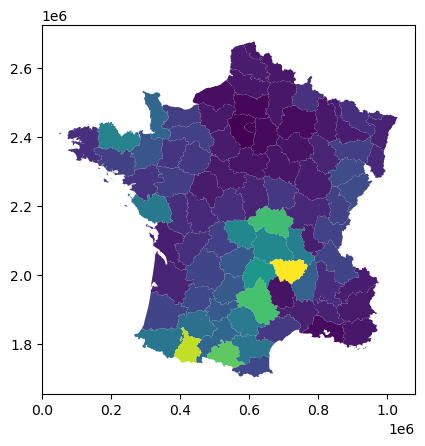

In [13]:
Guerri.plot("Suicids")

In [14]:
Matriz = SuicidiosDistancias[:,2].reshape(85,85)
Matriz

array([[     0.        , 407454.40105545, 169769.00926578, ...,
        319474.10168312, 245910.27610981, 236358.35230634],
       [407454.40105545,      0.        , 353166.72681392, ...,
        443512.88667366, 256691.98134024, 191311.35273577],
       [169769.00926578, 353166.72681392,      0.        , ...,
        160887.66156056, 313737.68383205, 163286.8261663 ],
       ...,
       [319474.10168312, 443512.88667366, 160887.66156056, ...,
             0.        , 467317.70881115, 280041.82720445],
       [245910.27610981, 256691.98134024, 313737.68383205, ...,
        467317.70881115,      0.        , 213803.59451131],
       [236358.35230634, 191311.35273577, 163286.8261663 , ...,
        280041.82720445, 213803.59451131,      0.        ]])

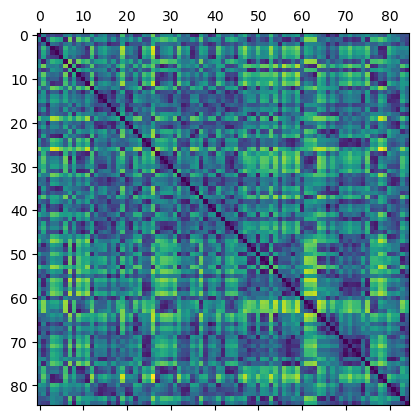

In [15]:
plt.matshow(Matriz)

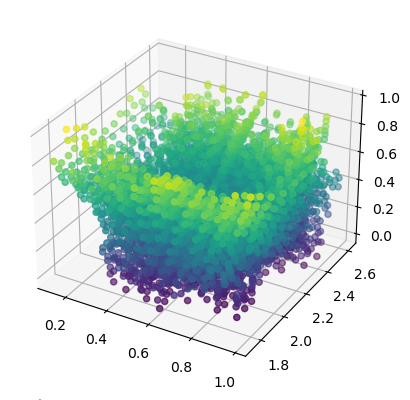

In [16]:

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(SuicidiosDistancias[:,0], SuicidiosDistancias[:,1], SuicidiosDistancias[:,2],c=SuicidiosDistancias[:,2])

## ANÁLISIS DE COMPONENTES PRINCIPALES (PCA)

(PCA) es una técnica utilizada para resumir datos de múltiples variables en menos variables interpretables llamadas componentes principales.

Un componente principal es una combinación lineal de los valores originales (o estandarizados) de las variables y se calcula extrayendo los vectores propios y valores propios de la matriz de varianza-covarianza o la matriz de correlación.

PCA reduce las dimensiones (variables) de un conjunto de datos multivariable a un conjunto de variables independientes no correlacionadas, llamadas componentes principales, para hacer análisis más completo y la interpretación más fácil, mientras que al mismo tiempo preservar la mayor parte de la información (variación) existente en el conjunto de datos.

### Miremos el PCA con un ejemplo

In [17]:
#Estandarización de los datos
Estandarizados = StandardScaler()

In [18]:
Guerri.columns

Index(['dept', 'Region', 'Dprtmnt', 'Crm_prs', 'Crm_prp', 'Litercy', 'Donatns',
       'Infants', 'Suicids', 'MainCty', 'Wealth', 'Commerc', 'Clergy',
       'Crm_prn', 'Infntcd', 'Dntn_cl', 'Lottery', 'Desertn', 'Instrct',
       'Prsttts', 'Distanc', 'Area', 'Pop1831', 'geometry'],
      dtype='object')

In [19]:
Guerri.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   dept      85 non-null     float64 
 1   Region    85 non-null     object  
 2   Dprtmnt   85 non-null     object  
 3   Crm_prs   85 non-null     float64 
 4   Crm_prp   85 non-null     float64 
 5   Litercy   85 non-null     float64 
 6   Donatns   85 non-null     float64 
 7   Infants   85 non-null     float64 
 8   Suicids   85 non-null     float64 
 9   MainCty   85 non-null     float64 
 10  Wealth    85 non-null     float64 
 11  Commerc   85 non-null     float64 
 12  Clergy    85 non-null     float64 
 13  Crm_prn   85 non-null     float64 
 14  Infntcd   85 non-null     float64 
 15  Dntn_cl   85 non-null     float64 
 16  Lottery   85 non-null     float64 
 17  Desertn   85 non-null     float64 
 18  Instrct   85 non-null     float64 
 19  Prsttts   85 non-null     float64 
 20  Dist

In [20]:
#Evaluemos los datos de alfabetización, suicidios, riqueza y clero
Columnas=["Litercy","Suicids","Wealth","Clergy"]

In [21]:
Datos = Guerri[Columnas]

In [22]:
Datos

Litercy   Suicids  Wealth  Clergy
0      37.0   35039.0    73.0    11.0
1      51.0   12831.0    22.0    82.0
2      13.0  114121.0    61.0    68.0
3      46.0   14238.0    76.0     5.0
4      69.0   16171.0    83.0    10.0
..      ...       ...     ...     ...
80     28.0   67963.0    56.0    70.0
81     25.0   21851.0    68.0    71.0
82     13.0   33497.0    67.0    76.0
83     62.0   33029.0    82.0    51.0
84     47.0   12789.0    30.0    55.0

[85 rows x 4 columns]

<Axes: xlabel='Litercy', ylabel='Suicids'>

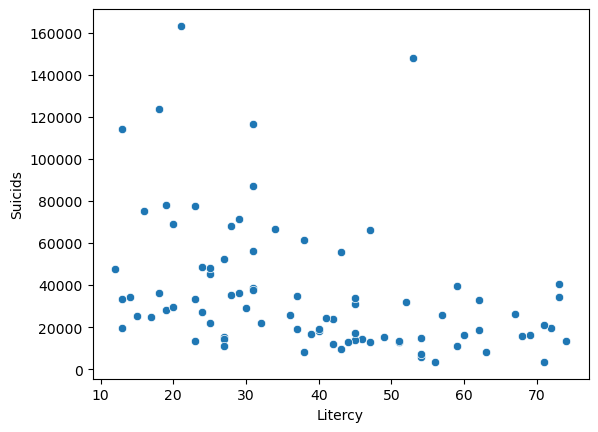

In [23]:
sns.scatterplot(x="Litercy",y="Suicids", data=Datos)

<Axes: xlabel='Wealth', ylabel='Suicids'>

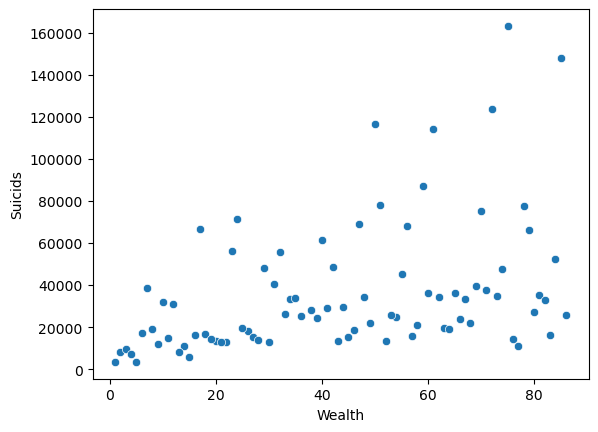

In [24]:
sns.scatterplot(x="Wealth",y="Suicids", data=Datos)

<Axes: xlabel='Clergy', ylabel='Suicids'>

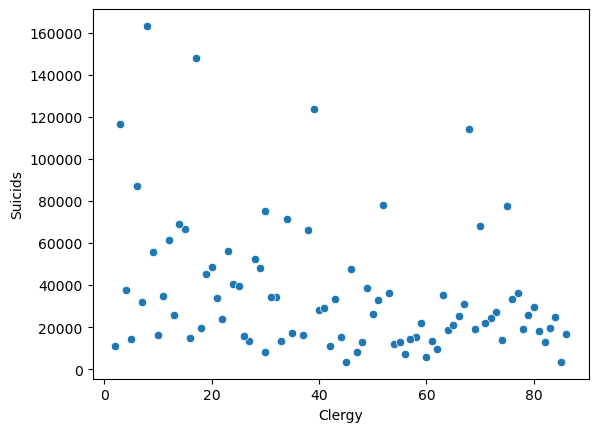

In [25]:
sns.scatterplot(x="Clergy",y="Suicids", data=Datos)

In [26]:
DatosEstandarizados = Estandarizados.fit_transform(Datos[Columnas])
DatosEstandarizados

array([[-1.23542648e-01, -4.71952301e-02,  1.17883156e+00,
        -1.34038044e+00],
       [ 6.84236204e-01, -7.56433064e-01, -8.64445057e-01,
         1.54965026e+00],
       [-1.50830639e+00,  2.47837872e+00,  6.98060594e-01,
         9.79785056e-01],
       [ 3.95743757e-01, -7.11498912e-01,  1.29902431e+00,
        -1.58460838e+00],
       [ 1.72280901e+00, -6.49766351e-01,  1.57947404e+00,
        -1.38108509e+00],
       [-7.00527543e-01,  5.11942738e-01,  1.61953829e+00,
        -6.48401254e-01],
       [ 1.60741204e+00, -3.29542658e-01, -4.23738335e-01,
         2.47101216e-01],
       [-1.21981395e+00,  2.78189981e+00,  1.13876732e+00,
        -2.00650019e-01],
       [ 1.14582412e+00, -8.15259436e-01, -1.18495904e+00,
        -7.85360455e-02],
       [-2.96638116e-01,  9.57483850e-01, -1.06476629e+00,
        -1.17756180e+00],
       [-4.69733585e-01,  2.55981588e+00,  2.57353872e-01,
        -1.66601770e+00],
       [-6.58441586e-02, -9.07299397e-01, -1.66573001e+00,
      

In [27]:
PCA3= PCA(n_components=3)

In [28]:
pca3 = PCA3.fit_transform(DatosEstandarizados)

In [29]:
#Revisemos los 4 primeros datos
pca3[:4]

array([[ 1.02596526, -0.93937774,  0.60783541],
       [-1.67834658,  0.91389586,  0.17957417],
       [ 2.42425696,  1.34927203, -0.60707595],
       [ 0.48966843, -1.33590001,  1.07672852]])

In [30]:
AnalisisPCA = pd.DataFrame({"PCA1":pca3[:,0],"PCA2":pca3[:,1], "PCA3":pca3[:,2], "Region": Guerri.Region})
AnalisisPCA

PCA1      PCA2      PCA3 Region
0   1.025965 -0.939378  0.607835      E
1  -1.678347  0.913896  0.179574      N
2   2.424257  1.349272 -0.607076      C
3   0.489668 -1.335900  1.076729      E
4   0.021438 -1.927356  1.944346      E
..       ...       ...       ...    ...
80  0.947039  1.111217  0.064024      W
81  0.339756  1.472517  0.798648      W
82  0.823397  1.980297  0.388191      C
83  0.104508 -0.428053  1.951924      E
84 -1.113440  0.178495  0.084249      C

[85 rows x 4 columns]

In [31]:
sns.scatterplot(x="PCA1",y="PCA2", hue="Region", data=AnalisisPCA)

<Axes: xlabel='PCA1', ylabel='PCA2'>

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")
x = AnalisisPCA["PCA1"]
y = AnalisisPCA["PCA2"]
z = AnalisisPCA["PCA3"]
colores = AnalisisPCA["Region"].map({"E":"r","N":"g","C":"b","S":"yellow","W":"brown"})

ax.scatter(x,y,z, c=colores, marker="o")
ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_zlabel("PCA3")

plt.show()

### Revisemos otro ejemplo

In [33]:
import pysal

In [34]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, header=None)
df.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]

In [35]:
# Normalizamos los datos
X = df.iloc[:, 0:4].values # Extraer solo las variables numéricas
estandarizar = StandardScaler()
X = estandarizar.fit_transform(X) # Normalizar los datos

In [36]:
X = pd.DataFrame(X, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])

In [37]:
X

sepal_length  sepal_width  petal_length  petal_width
0       -0.900681     1.032057     -1.341272    -1.312977
1       -1.143017    -0.124958     -1.341272    -1.312977
2       -1.385353     0.337848     -1.398138    -1.312977
3       -1.506521     0.106445     -1.284407    -1.312977
4       -1.021849     1.263460     -1.341272    -1.312977
..            ...          ...           ...          ...
145      1.038005    -0.124958      0.819624     1.447956
146      0.553333    -1.281972      0.705893     0.922064
147      0.795669    -0.124958      0.819624     1.053537
148      0.432165     0.800654      0.933356     1.447956
149      0.068662    -0.124958      0.762759     0.790591

[150 rows x 4 columns]

In [38]:
PCA_especies= PCA(n_components=3)

In [39]:
pca_sp_ft = PCA_especies.fit_transform(X)

In [40]:
pca_sp = PCA_especies.fit(X)

In [41]:
pca_sp.explained_variance_ratio_

array([0.72770452, 0.23030523, 0.03683832])

<Axes: >

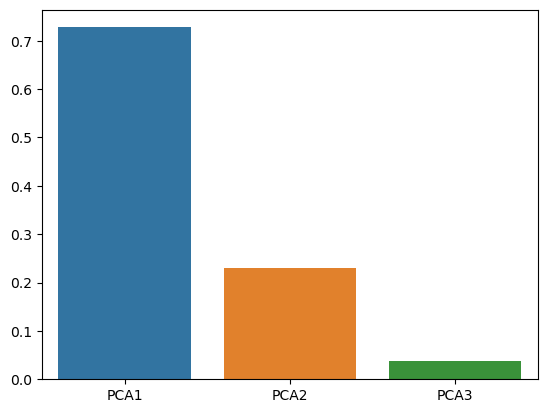

In [42]:
sns.barplot(x=["PCA1","PCA2","PCA3"], y=pca_sp.explained_variance_ratio_)

In [43]:
PCA_SP = pd.DataFrame({"PCA1":pca_sp_ft[:,0],"PCA2":pca_sp_ft[:,1], "PCA3":pca_sp_ft[:,2], "species": df.iloc[:,4]})
PCA_SP

PCA1      PCA2      PCA3         species
0   -2.264542  0.505704 -0.121943     Iris-setosa
1   -2.086426 -0.655405 -0.227251     Iris-setosa
2   -2.367950 -0.318477  0.051480     Iris-setosa
3   -2.304197 -0.575368  0.098860     Iris-setosa
4   -2.388777  0.674767  0.021428     Iris-setosa
..        ...       ...       ...             ...
145  1.870522  0.382822  0.254532  Iris-virginica
146  1.558492 -0.905314 -0.025382  Iris-virginica
147  1.520845  0.266795  0.179277  Iris-virginica
148  1.376391  1.016362  0.931405  Iris-virginica
149  0.959299 -0.022284  0.528794  Iris-virginica

[150 rows x 4 columns]

In [44]:
np.unique(PCA_SP["species"])

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

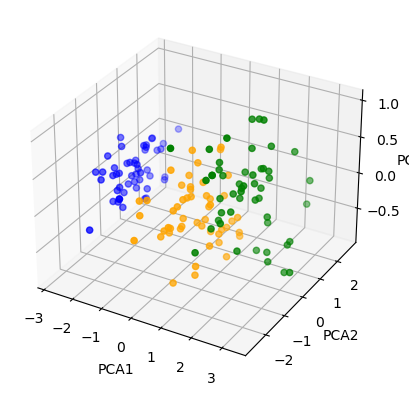

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")
x = PCA_SP["PCA1"]
y = PCA_SP["PCA2"]
z = PCA_SP["PCA3"]
colores = PCA_SP["species"].map({'Iris-setosa':"b", 'Iris-versicolor':"orange", 'Iris-virginica':"green"})

ax.scatter(x,y,z, c=colores, marker="o")
ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_zlabel("PCA3")

plt.show()

In [46]:
sns.scatterplot(x="PCA1",y="PCA2", hue="species", data=PCA_SP)

<Axes: xlabel='PCA1', ylabel='PCA2'>

In [47]:
sns.scatterplot(x="PCA1",y=np.linspace(-0.00,0.00,150), hue="species", data=PCA_SP)

<Axes: xlabel='PCA1'>

En el caso anterior, se creo una recta numérica del PCA1 para capturar las relaciones que buscábamos inicialmente en los datos de ejemplo.

La distancia entre los puntos (en las gráficas de PCA) refleja su similitud o diferencia en términos de estas variables. Los puntos que están más cerca tienen valores más parecidos, y los que están más lejos tienen valores más diferentes. Además, los colores de los puntos indican la especie a la que pertenece cada flor, lo que permite ver si hay algún patrón o agrupamiento según esta característica. Por ejemplo, se puede observar que las flores iris setosa se separan claramente de las otras dos especies, mientras que las flores iris versicolor e iris virginica se solapan parcialmente.

Para interpretar un poco mejor los resultados obtenidos en el PCA, vamos a realizar un análisis de las variables que lo componen.

In [48]:
df

sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]

In [49]:
df.boxplot(by="species",layout=(2, 2), figsize=(10, 10))

array([[<Axes: title={'center': 'petal_length'}, xlabel='[species]'>,
        <Axes: title={'center': 'petal_width'}, xlabel='[species]'>],
       [<Axes: title={'center': 'sepal_length'}, xlabel='[species]'>,
        <Axes: title={'center': 'sepal_width'}, xlabel='[species]'>]],
      dtype=object)

Los diagramas de caja nos muestran una serie de detalles, como que virginica tiene la longitud mediana de pétalos más grande. 

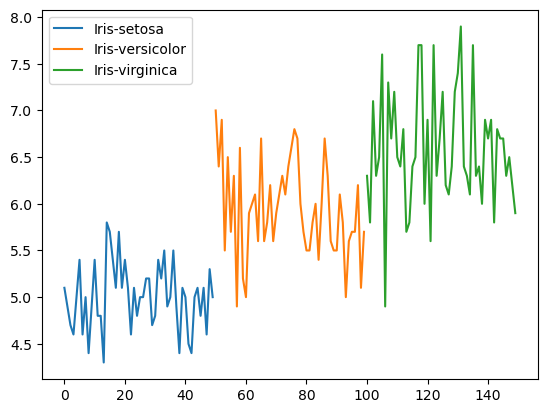

In [50]:
df[df.species=="Iris-setosa"].sepal_length.plot(label='Iris-setosa')
df[df.species=="Iris-versicolor"].sepal_length.plot(label='Iris-versicolor')
df[df.species=="Iris-virginica"].sepal_length.plot(label='Iris-virginica')
plt.legend()

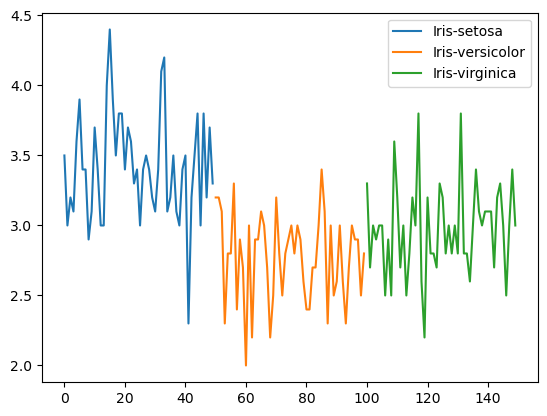

In [51]:
df[df.species=="Iris-setosa"].sepal_width.plot(label='Iris-setosa')
df[df.species=="Iris-versicolor"].sepal_width.plot(label='Iris-versicolor')
df[df.species=="Iris-virginica"].sepal_width.plot(label='Iris-virginica')
plt.legend()

In [52]:
df[df.species=="Iris-setosa"].petal_width.plot(label='Iris-setosa')
df[df.species=="Iris-versicolor"].petal_width.plot(label='Iris-versicolor')
df[df.species=="Iris-virginica"].petal_width.plot(label='Iris-virginica')
plt.legend()

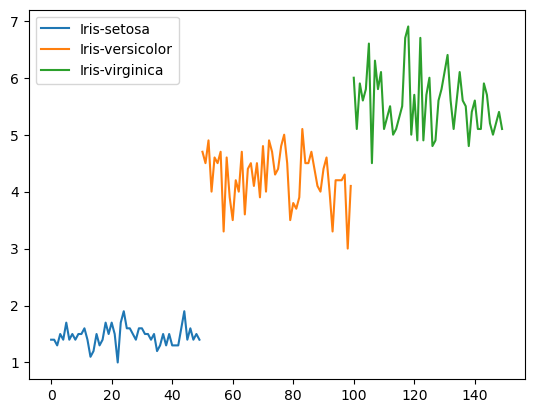

In [53]:
df[df.species=="Iris-setosa"].petal_length.plot(label='Iris-setosa')
df[df.species=="Iris-versicolor"].petal_length.plot(label='Iris-versicolor')
df[df.species=="Iris-virginica"].petal_length.plot(label='Iris-virginica')
plt.legend()

En las gráficas, se puede observar que las muestras de versicolor y virignica están más juntas, mientras que la setosa está más alejada de ambas. Si revisamos los boxplot anteriores, virginica tenía la mayor longitud promedio de sépalos, longitud de pétalos y ancho de pétalos. Mientras que, setosa tuvo el ancho de sépalo promedio más alto. Se puede ver que esto es cierto siguiendo los ejes de las características originales.

In [54]:
PCA_SP[PCA_SP.PCA1 <= 0]

PCA1      PCA2      PCA3          species
0  -2.264542  0.505704 -0.121943      Iris-setosa
1  -2.086426 -0.655405 -0.227251      Iris-setosa
2  -2.367950 -0.318477  0.051480      Iris-setosa
3  -2.304197 -0.575368  0.098860      Iris-setosa
4  -2.388777  0.674767  0.021428      Iris-setosa
5  -2.070537  1.518549  0.030684      Iris-setosa
6  -2.445711  0.074563  0.342198      Iris-setosa
7  -2.233842  0.247614 -0.082574      Iris-setosa
8  -2.341958 -1.095146  0.153562      Iris-setosa
9  -2.188676 -0.448629 -0.246560      Iris-setosa
10 -2.163487  1.070596 -0.264009      Iris-setosa
11 -2.327378  0.158587  0.100166      Iris-setosa
12 -2.224083 -0.709118 -0.223215      Iris-setosa
13 -2.639716 -0.938282  0.189570      Iris-setosa
14 -2.192292  1.889979 -0.469480      Iris-setosa
15 -2.251465  2.722371  0.032604      Iris-setosa
16 -2.202750  1.513750 -0.001363      Iris-setosa
17 -2.190179  0.514304 -0.038616      Iris-setosa
18 -1.894074  1.431111 -0.370743      Iris-setosa
19 -2.339949  1.158033  0.137418      Iris-setosa
20 -1.914556  0.430465 -0.416007      Iris-setosa
21 -2.204645  0.952457  0.164738      Iris-setosa
22 -2.774170  0.489517  0.338836      Iris-setosa
23 -1.820412  0.106751  0.040061      Iris-setosa
24 -2.228217  0.162186  0.124201      Iris-setosa
25 -1.957024 -0.607893 -0.298591      Iris-setosa
26 -2.052063  0.266014  0.092093      Iris-setosa
27 -2.168194  0.552016 -0.201295      Iris-setosa
28 -2.140306  0.336640 -0.265315      Iris-setosa
29 -2.268790 -0.314879  0.075515      Iris-setosa
30 -2.144554 -0.483942 -0.067856      Iris-setosa
31 -1.831938  0.445267 -0.265375      Iris-setosa
32 -2.608203  1.828475  0.051420      Iris-setosa
33 -2.437951  2.185392 -0.079350      Iris-setosa
34 -2.188676 -0.448629 -0.246560      Iris-setosa
35 -2.211120 -0.184338 -0.218625      Iris-setosa
36 -2.044417  0.684956 -0.479412      Iris-setosa
37 -2.188676 -0.448629 -0.246560      Iris-setosa
38 -2.435952 -0.882169  0.201558      Iris-setosa
39 -2.170547  0.292727 -0.169939      Iris-setosa
40 -2.286527  0.467992  0.040737      Iris-setosa
41 -1.871707 -2.327692 -0.194529      Iris-setosa
42 -2.557834 -0.453816  0.313572      Iris-setosa
43 -1.964279  0.497392  0.314756      Iris-setosa
44 -2.133373  1.171432  0.252793      Iris-setosa
45 -2.075358 -0.691917 -0.056559      Iris-setosa
46 -2.381258  1.150633  0.062102      Iris-setosa
47 -2.398192 -0.362391  0.146856      Iris-setosa
48 -2.226781  1.025483 -0.176645      Iris-setosa
49 -2.205954  0.032238 -0.146594      Iris-setosa
57 -0.497863 -1.848869  0.255555  Iris-versicolor
60 -0.124697 -2.658063 -0.039813  Iris-versicolor
64 -0.037258 -0.432795  0.198061  Iris-versicolor
79 -0.047282 -1.057212 -0.315319  Iris-versicolor
93 -0.373628 -2.017932  0.112184  Iris-versicolor
98 -0.457013 -1.539465  0.196126  Iris-versicolor

## CLÚSTER ANÁLISIS

El análisis de conglomerados es un proceso en el que los objetos (observaciones) de un conjunto de datos se agrupan en varios conglomerados. Los conglomerados se forman sobre la base de que los objetos dentro de un conglomerado son lo más similares posible (con respecto a sus atributos/características), mientras que los objetos que pertenecen a diferentes conglomerados son lo más diferentes posible.

La formación de los conglomerados se basa en una matriz de distancias entre todos observaciones en el conjunto de datos, tal como vimos anteriormente con la distancia Euclidea.

## Vamos hacer un ejemplo de análisis clúster con los datos anteriomente mostrados

In [55]:
#Vamos a realizar 3 grupos de datos
# Fijamos el estado aleatorio para reproducibilidad
kmeans = KMeans(n_clusters=3, random_state=0)

In [56]:
kmeans.fit(X)

C:\Users\valiz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\valiz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [57]:
centroides = kmeans.cluster_centers_ # Los centroides de cada grupo

In [58]:
centroides

array([[-0.05021989, -0.88029181,  0.34753171,  0.28206327],
       [-1.01457897,  0.84230679, -1.30487835, -1.25512862],
       [ 1.13597027,  0.09659843,  0.996271  ,  1.01717187]])

In [59]:
etiquetas = kmeans.labels_ # Las etiquetas asignadas a cada observación
etiquetas

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [60]:
inercia = kmeans.inertia_ # La suma de las distancias al cuadrado de cada observación a su centroide más cercano

inercia

140.96581663074699

In [61]:
n_iter = kmeans.n_iter_ # El número de iteraciones realizadas por el algoritmo
n_iter

3

In [62]:
X

sepal_length  sepal_width  petal_length  petal_width
0       -0.900681     1.032057     -1.341272    -1.312977
1       -1.143017    -0.124958     -1.341272    -1.312977
2       -1.385353     0.337848     -1.398138    -1.312977
3       -1.506521     0.106445     -1.284407    -1.312977
4       -1.021849     1.263460     -1.341272    -1.312977
..            ...          ...           ...          ...
145      1.038005    -0.124958      0.819624     1.447956
146      0.553333    -1.281972      0.705893     0.922064
147      0.795669    -0.124958      0.819624     1.053537
148      0.432165     0.800654      0.933356     1.447956
149      0.068662    -0.124958      0.762759     0.790591

[150 rows x 4 columns]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


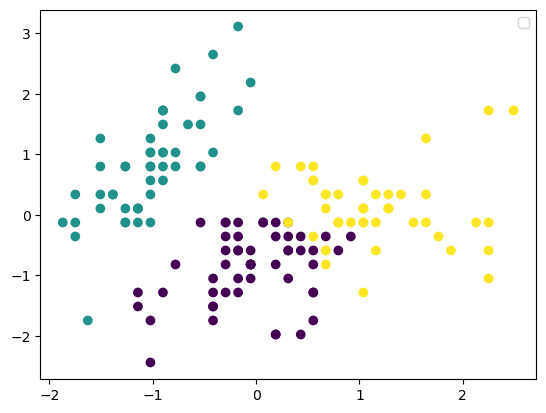

In [63]:
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=etiquetas)
plt.legend()

In [64]:
plt.scatter(centroides[:, 0], centroides[:, 1], c="black", marker="x") # Graficar los centroides con color negro y forma de cruz

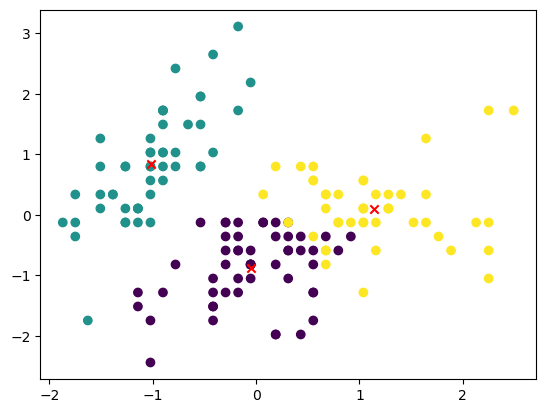

In [65]:
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=etiquetas)
plt.scatter(centroides[:, 0], centroides[:, 1], c="red", marker="x") # Graficar los centroides con color negro y forma de cruz